<a href="https://colab.research.google.com/github/piglesias98/VC/blob/master/Caltech_UCSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 3

## Funciones auxiliares

In [0]:
path= "/imagenes"
#path = "/content/drive/My Drive/VC/images"
#path = "/tmp"

In [0]:
#########################################################################
################## FUNCIÓN PARA LEER LAS IMÁGENES #######################
#########################################################################

# Dado un fichero train.txt o test.txt y el path donde se encuentran los
# ficheros y las imágenes, esta función lee las imágenes
# especificadas en ese fichero y devuelve las imágenes en un vector y 
# sus clases en otro.

def leerImagenes(vec_imagenes, path):
  clases = np.array([img.split('/')[0] for img in vec_imagenes])
  imagenes = np.array([img_to_array(load_img(path + "/" + img, 
                                             target_size = (224, 224))) 
                       for img in vec_imagenes])
  return imagenes, clases

In [0]:
#########################################################################
############# FUNCIÓN PARA CARGAR EL CONJUNTO DE DATOS ##################
#########################################################################

# Usando la función anterior, y dado el path donde se encuentran las
# imágenes y los archivos "train.txt" y "test.txt", devuelve las 
# imágenes y las clases de train y test para usarlas con keras
# directamente.

def cargar_datos(path):
  # Cargamos los ficheros
  train_images = np.loadtxt(path + "/train.txt", dtype = str)
  test_images = np.loadtxt(path + "/test.txt", dtype = str)
  
  # Leemos las imágenes con la función anterior
  train, train_clases = leerImagenes(train_images, path)
  test, test_clases = leerImagenes(test_images, path)
  
  # Pasamos los vectores de las clases a matrices 
  # Para ello, primero pasamos las clases a números enteros
  clases_posibles = np.unique(np.copy(train_clases))
  for i in range(len(clases_posibles)):
    train_clases[train_clases == clases_posibles[i]] = i
    test_clases[test_clases == clases_posibles[i]] = i

  # Después, usamos la función to_categorical()
  train_clases = np_utils.to_categorical(train_clases, 200)
  test_clases = np_utils.to_categorical(test_clases, 200)
  
  # Barajar los datos
  train_perm = np.random.permutation(len(train))
  train = train[train_perm]
  train_clases = train_clases[train_perm]

  test_perm = np.random.permutation(len(test))
  test = test[test_perm]
  test_clases = test_clases[test_perm]
  
  return train, train_clases, test, test_clases

In [0]:
#########################################################################
############# FUNCIÓN DESCOMPRIMIR ARCHIVOS ZIP DE DRIVE#################
#########################################################################


# Zip Path
#file_name = "CUB-200"
#zip_path = "/content/drive/My Drive/VC/CUB-200.zip"
# Mount Path (best way temp folder so we dont loose drive's space)
#to_path="/tmp"
# Remove if we want to rebuild
#!rm -rf "$to_path"
# Unzip into the "mount path"
#!unzip -q "$zip_path" -d "$to_path"
# Rename with the created folder
#to_path = to_path + "/" + file_name

## Usar ResNet50 preentrenada en ImageNet como un extractor de características





3033/3033 [==============================] - 8s 3ms/step
Train on 3000 samples, validate on 3033 samples
Epoch 1/5
3000/3000 [==============================] - 2s 580us/step - loss: 4.3211 - acc: 0.1357 - val_loss: 3.4200 - val_acc: 0.2143
Epoch 2/5
3000/3000 [==============================] - 0s 140us/step - loss: 1.8436 - acc: 0.5350 - val_loss: 2.6588 - val_acc: 0.3508
Epoch 3/5
3000/3000 [==============================] - 0s 143us/step - loss: 0.8687 - acc: 0.7850 - val_loss: 2.5670 - val_acc: 0.3676
Epoch 4/5
3000/3000 [==============================] - 0s 139us/step - loss: 0.4573 - acc: 0.9033 - val_loss: 2.4363 - val_acc: 0.4082
Epoch 5/5
3033/3033 [==============================] - 0s 43us/step
Test loss 2.3767653097227543
Test accuracy 0.4309264754859913


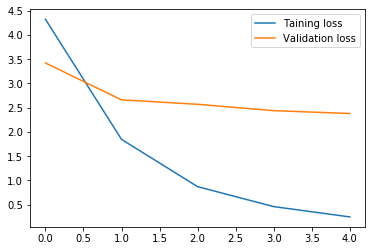

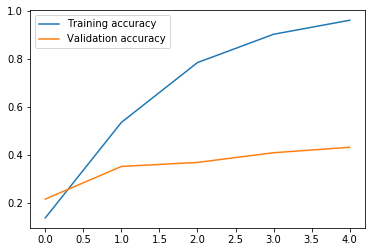

In [0]:
def ejercicio3_1():
  #Definimos el modelo que vamos a entrenar, con tan solo dos capas
  modelo = Sequential()
  modelo.add(Dense(1024,input_shape=(2048, ), activation='relu'))
  modelo.add(Dense(200, activation = 'softmax'))
  batch_size=32
  epocas=5  #5 épocas son más que suficientes
  #Optimizador
  opt = SGD(lr=0.01, momentum = 0.9, decay=1e-6, nesterov=True )
  #Compilación
  modelo.compile(opt, loss='categorical_crossentropy', metrics=['accuracy'])
  #Datos
  x_train, y_train, x_test, y_test = cargar_datos(path)
  #Preprocesamiento de datos con la función que nos proporciona ResNet50
  x_train = preprocess_input(x_train)
  x_test = preprocess_input(x_test)
  #UTILIZAMOS RESNET COMO EXTRACTOR DE CARACTERÍSTICAS
  #Con include top = False no incluímos la última capa de la red
  #Añadimos los pesos de imagenet (la red ya está entrenada)
  modelo_base = ResNet50(include_top=False, pooling='avg', weights='imagenet')
  #Extraemos las características y utilizamos x_train_exctractor y x_test_extractor
  #para entrenar con nuestro modelo antes definido
  x_train_extractor = modelo_base.predict(x_train, batch_size=batch_size, verbose=1)
  x_test_extractor = modelo_base.predict(x_test, batch_size=batch_size, verbose=1)
  #Entrenamiento
  #Al no haber utilizado ImageDataGenerator podemos utilizar fit()
  histograma = modelo.fit(x_train_extractor,
                          y_train,
                          batch_size=batch_size,
                          epochs = epocas,
                          verbose=1,
                          validation_data=(x_test_extractor,y_test),
                          validation_split=0.1)
  score = modelo.evaluate(x_test_extractor, y_test)
  print('Test loss', score[0])
  print('Test accuracy', score[1])
  mostrarEvolucion(histograma)

## Fine Tuning



Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
____________________________________________________________________________________________

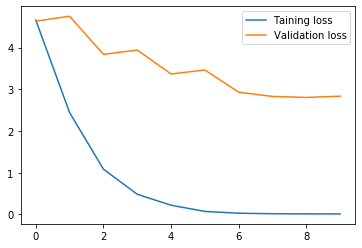

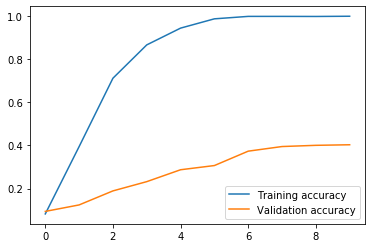

In [0]:
def ejercicio3_2():
  #Definimos nuestro modelo base preentrenado
  #Con include top = False no incluímos la última capa de la red
  modelo_base = ResNet50(include_top=False, pooling='avg', weights='imagenet')
  x=modelo_base.output
  #Añadimos una red totalmente conectada
  x = Dense(1024, activation='relu')(x)
  #y como tenemos 200 clases, una capa para esta logística
  predicciones = Dense(200, activation='softmax')(x)

  #Este es el modelo que entrenaremos (resnet + 2 capas dense)
  modelo = Model(inputs=modelo_base.input, outputs = predicciones)
  modelo.summary()


  #COMPILAMOS Y ENTRENAMOS
  batch_size=32
  epocas=10
  #Optimizador
  opt = SGD(lr=0.01, momentum = 0.9, decay=1e-6, nesterov=True )
  #Compilación
  modelo.compile(opt, loss='categorical_crossentropy', metrics=['accuracy'])
  #Datos
  x_train, y_train, x_test, y_test = cargar_datos(path)

  #Entrenamineto
  #Al no haber utilizado ImageDataGenerator podemos utilizar fit()
  histograma = modelo.fit(x_train,
                          y_train,
                          batch_size=batch_size,
                          epochs = epocas,
                          verbose=1,
                          validation_data=(x_test,y_test),
                          validation_split=0.1)
  score = modelo.evaluate(x_test, y_test)
  print('Test loss', score[0])
  print('Test accuracy', score[1])
  mostrarEvolucion(histograma)

In [0]:
print(">>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>Fine Tuning")
ejercicio3_2()
input("Pulse Enter para continuar")